In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import hashing_trick
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils
from numpy import zeros, newaxis
import numpy as np
import csv
import matplotlib.pyplot as plt
import re


#import dataset

# legitime : http://www.impact-im.com/threads/liste-de-500000-e-mail-fran%C3%A7ais.740/
# spam : https://github.com/tsirolnik/spam-domains-list/blob/master/spamdomains.txt

vocab_size = 50000


with open('./dataset/fusion/train_data.csv', newline='', encoding='latin-1') as csvfile:
        reader = csv.reader(csvfile)
        train_data_tab = []
        for line in reader:
                train_data_tab.extend(line)

for i in range (len(train_data_tab)):
    if re.search(r'@.+', train_data_tab[i]):
        train_data_tab[i] = re.sub(r'@.+', '@laposte.fr', train_data_tab[i])
    elif re.search(r'\.\w{3,4}($|\?)', train_data_tab[i]):
        re.sub(r'\.\w{3,4}($|\?)', '@laposte.fr', train_data_tab[i])
    else:
        train_data_tab[i] += '@laposte.fr'


train_data = " ".join(str(x) for x in train_data_tab)
train_data = hashing_trick(train_data, vocab_size, hash_function='md5', filters='')




##################################################################


with open('./dataset/fusion/train_labels.csv', newline='', encoding='latin-1') as csvfile:
        reader = csv.reader(csvfile)
        train_labels = []
        for line in reader:
                train_labels.extend(line)
                
train_labels = list(map(int, train_labels))




##################################################################


with open('./dataset/fusion/test_data.csv', newline='', encoding='latin-1') as csvfile:
        reader = csv.reader(csvfile)
        test_data_tab = []
        for line in reader:
                test_data_tab.extend(line)

for i in range (len(test_data_tab)):
    if re.search(r'@.+', test_data_tab[i]):
        test_data_tab[i] = re.sub(r'@.+', '@laposte.fr', test_data_tab[i])
    elif re.search(r'\.\w{3,4}($|\?)', test_data_tab[i]):
        re.sub(r'\.\w{3,4}($|\?)', '@laposte.fr', test_data_tab[i])
    else:
        test_data_tab[i] += '@laposte.fr'
        
        

test_data = " ".join(str(x) for x in test_data_tab)
test_data = hashing_trick(test_data, vocab_size, hash_function='md5', filters='')



##################################################################



with open('./dataset/fusion/test_labels.csv', newline='', encoding='latin-1') as csvfile:
        reader = csv.reader(csvfile)
        test_labels = []
        for line in reader:
                test_labels.extend(line)

test_labels = list(map(int, test_labels))









Using TensorFlow backend.


In [4]:
#build le model

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, GlobalAveragePooling1D

vocab_size = 50000
num_labels = 2


model = Sequential()
model.add(Embedding(50000,1))
model.add(GlobalAveragePooling1D())
model.add(Dense(512, activation=tf.nn.sigmoid))
model.add(Dense(1, activation=tf.nn.sigmoid))
model.summary()


model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])




history = model.fit(train_data,
                    train_labels,
                    epochs=25,
                    batch_size=2048,
                    validation_data=(test_data, test_labels),
                    verbose=1)






_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 1)           50000     
_________________________________________________________________
global_average_pooling1d_2 ( (None, 1)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1024      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
Total params: 51,537
Trainable params: 51,537
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 50000 samples
Epoch 1/25
50000/50000 [==============================] - 1s 12us/step - loss: 0.6942 - acc: 0.5042 - val_loss: 0.6934 - val_acc: 0.5000
Epoch 2/25
50000/50000 [==============================] - 0s 8us/step - loss: 0.692

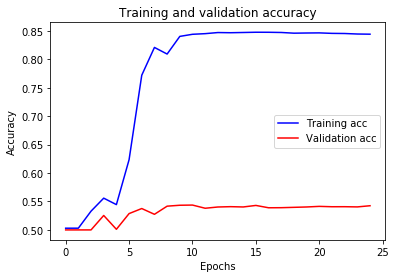

In [3]:
acc_values = history.history['acc']
val_acc_values = history.history['val_acc']


plt.plot(acc_values, 'b', label='Training acc')
plt.plot( val_acc_values, 'b',color='red', label='Validation acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:

##################################
##                              ##
##            evaluate          ##
##                              ##
##################################
# Evaluate the model

#results = model.evaluate(test_data, test_labels)
#print(results)


evaluate_data = ['a@laposte.fr']
evaluate_data = hashing_trick(evaluate_data[0], round(vocab_size), hash_function='md5', filters='')
print(evaluate_data)
predicted_classes = model.predict_classes(np.array(evaluate_data))
print(predicted_classes)